In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [119]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [120]:
len(df)

7043

In [121]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [122]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From the dtypes table above, it can be seen that the TotalCharges column has been declared as an Object. 

It is a numeric column that should contain the total amount of money a client was charged.

The reason pandas declares this column as an object is because of the presence of non-numeric characters such as space present in the column. 

We solve it by using pd.to_numeric(column, errors='coerce') as shown below.

This will convert all nonnumeric values into null.

In [123]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [124]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [125]:
df.columns = df.columns.str.lower().str.replace(' ','_') # This  will lowercase all the columns names and replace spaces with underscores

string_columns = list(df.dtypes[df.dtypes == 'object'].index) # Thus is to select columns with string values\

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # lowercases and replaces spaces with underscores for values in all string columns in the dataframe
    

In [126]:
df.churn = (df.churn == 'yes').astype('int')

In [127]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [128]:
df_train_full.head().T

,1814,5946,3881,2389,3676
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


In [129]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [130]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

- Checking for class imbalance

In [131]:
global_mean = df_train_full.churn.mean()

In [132]:
round(global_mean, 3)

0.27

In [133]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [134]:
categorical = ["gender", "seniorcitizen", "partner", "dependents",
                "phoneservice", "multiplelines", "internetservice",
                "onlinesecurity", "onlinebackup", "deviceprotection",
                "techsupport", "streamingtv", "streamingmovies",
                "contract", "paperlessbilling", "paymentmethod"]

numerical = ["tenure", "monthlycharges", "totalcharges"]

In [135]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [136]:
female_mean = df_train_full[df_train_full.gender == "female"].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == "male"].churn.mean()
print('gender == male:', round(male_mean, 3))

gender == female: 0.277
gender == male: 0.263


In [137]:
partner_yes = df_train_full[df_train_full.partner == "yes"].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == "no"].churn.mean()
print('partner == no:', round(partner_no, 3))

partner == yes: 0.205
partner == no: 0.33


In [138]:
from IPython.display import display

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,rate
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [139]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)


df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [140]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [141]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [142]:
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [143]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)


In [144]:
X_train[0]


array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [145]:
dv.get_feature_names()

/Users/timi/Desktop/ML-BookCamp/ch2-car-price/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [146]:
def logistic_regression(xi):
    score = bias
    for j in range(n):
        score = score + xi[j] * w[j]
    prob = sigmoid(score)
    return prob

In [147]:
import math

def sigmoid(score):
    return 1 / (1+math.exp(-score))

In [148]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [149]:
val_dict = df_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [150]:
y_pred = model.predict_proba(X_val)

In [151]:
y_pred = model.predict_proba(X_val)[:, 1]

In [152]:
churn = y_pred >= 0.5

In [153]:
(y_val == churn).mean()

0.8016129032258065

In [154]:
model.intercept_[0]

-0.12198867755078616

In [155]:
model.coef_[0]

array([ 5.63348181e-01, -8.59184486e-02, -5.99418410e-01, -3.02816754e-02,
       -9.17070022e-02,  9.99284421e-02, -1.15868758e-01, -1.06048361e-01,
       -2.73676033e-02, -9.46210743e-02, -3.23346631e-01,  3.17226711e-01,
       -1.15868758e-01,  7.84349475e-04, -1.68096747e-01,  1.27133666e-01,
       -8.10255973e-02,  1.35705426e-01, -1.15868758e-01, -1.41825345e-01,
        2.57859845e-01, -1.15868758e-01, -2.63979764e-01, -2.12614697e-01,
        9.06260192e-02, -4.80290542e-02, -7.39596234e-02, -2.66762090e-02,
       -1.36244802e-01,  1.74746662e-01, -1.33814328e-01,  1.27133666e-01,
       -2.49122344e-01,  2.97089052e-01, -8.48641309e-02, -1.15868758e-01,
        7.87442117e-02, -9.90798154e-02, -1.15868758e-01,  9.29598961e-02,
        1.78139749e-01, -1.15868758e-01, -1.84259668e-01, -6.94863811e-02,
        4.47682384e-04])

In [156]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [157]:
small_subset = ['contract','tenure','totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

In [158]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [159]:
model_small = LogisticRegression(solver="liblinear", random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [160]:
model_small.intercept_[0]

-0.5772299088595961

In [161]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.866,
 'contract=one_year': -0.327,
 'contract=two_year': -1.117,
 'tenure': -0.094,
 'totalcharges': 0.001}

In [162]:
customer = {
    'customerid' : '8879-zkjof',
    'gender' : 'female',
    'seniorcitizen' : 0,
    'partner' : 'no',
    'dependents' : 'no',
    'tenure' : 41,
    'phoneservice' : 'yes',
    'multiplelines' : 'no',
    'internetservice' : 'dsl',
    'onlinesecurity' : 'yes',
    'onlinebackup' : 'no',
    'deviceprotection' : 'yes',
    'techsupport' : 'yes',
    'streamingtv' : 'yes',
    'streamingmovies' : 'yes',
    'contract' : 'one_year',
    'paperlessbilling':'yes',
    'paymentmethod':'bank_transfer_(automatic)',
    'monthlycharges':79.85,
    'totalcharges' : 3320.75,
 }

X_test = dv.transform([customer])


In [163]:
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [164]:
model.predict_proba(X_test)

array([[0.92667829, 0.07332171]])

In [165]:
model.predict_proba(X_test)[0,1]

0.07332171280800483

In [166]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0,1,11)

for t in thresholds:
    churn = y_pred >= t
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


In [167]:
thresholds = np.linspace(0,1,21)
accuracies = []
for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)


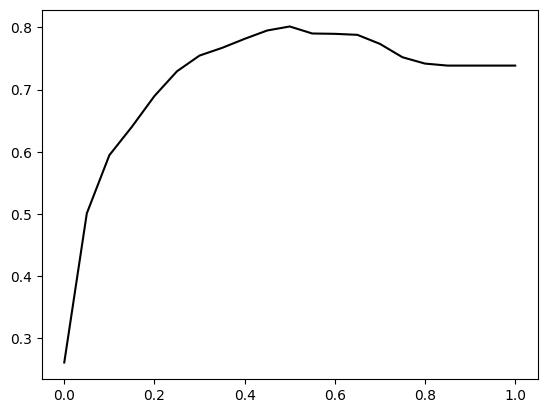

In [168]:
plt.plot(thresholds, accuracies, color='black')

In [169]:
val_dict_small = df_val[small_subset].to_dict(orient='records')

x_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(x_small_val)[:, 1]

churn_small = y_pred_small >= 0.5
accuracy_score(y_val, churn_small)

0.7672043010752688

In [170]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)

In [171]:
accuracy_score(baseline, y_val)

0.7387096774193549

- True Negative (TN): We predict False ("No churn") and the actual label is also False ("No churn")

- True Positive (TP): We predict True ("churn") and the actual label is also True ("churn")

- False Negative (FN): We predict False ("No churn") but the actual label is  True ("churn") 

- False Positive (FP): We predict True ("churn") but the actual label is False ("No churn")

In [172]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

true_negative = (predict_no_churn & actual_churn).sum()
false_negative = (predict_no_churn & actual_no_churn).sum()

In [173]:
confusion_table = np.array(
    [[true_negative, false_positive],
    [false_negative, true_positive]]
)

In [174]:
confusion_table

array([[ 197,  172],
       [1202,  289]])

In [175]:
confusion_table / confusion_table.sum()

array([[0.10591398, 0.09247312],
       [0.64623656, 0.15537634]])

The precision of a model tells us how many of the positive predictions turned out to be correct. It is the fraction of the correctly predicited examples.

In our case, it is the numnber of customers who actually churbed (TP) out of all the customers we thought would churn.

P = TP / (TP + FP)

Recall is the fraction of correctly classified positive examples among all positive examples.

R = TP / (TP + FN)

Receiver Operating Characteristic (ROC) is based on two quantities TPR (True Positive Rate) and FPR (False Positive Rate)

FPR = FP / (FP + TN)

TPR = TP / (TP + FN)

FPR is the faction of users we predicted as churning among everybody who didn't churn. A small value for FPR tells us that a model is good - it has few false positives

TPR is the fraction of users we predicted as churning among everybody who actually didn't churn. TPR is the same as recall.

In [176]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    predict_churn = (y_pred >= t)
    predict_no_churn = (y_pred < t)

    actual_churn = (y_val == 1)
    actual_no_churn = (y_val == 0)

    true_positive = (predict_churn & actual_churn).sum()
    false_positive = (predict_churn & actual_no_churn).sum()

    false_negative = (predict_no_churn & actual_churn).sum()
    true_negative = (predict_no_churn & actual_no_churn).sum()
    scores.append((t,true_positive,false_positive,false_negative,true_negative))

df_scores = pd.DataFrame(scores)

df_scores.columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']


In [177]:
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [178]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [179]:
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


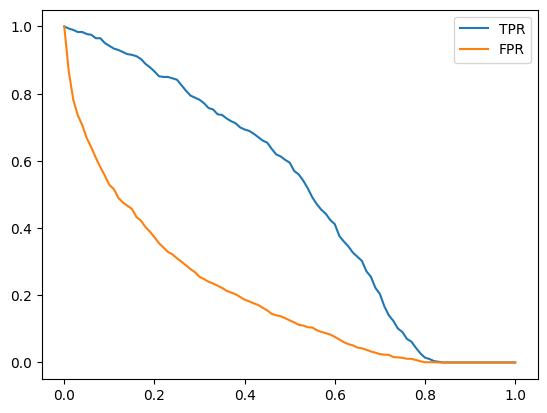

In [180]:
plt.plot(df_scores.thresholds, df_scores.tpr, label='TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, label='FPR')
plt.legend()

In [181]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0,1,101)
    
    for t in thresholds:
        predict_churn = (y_pred >= t)
        predict_no_churn = (y_pred < t)

        actual_churn = (y_val == 1)
        actual_no_churn = (y_val == 0)

        true_positive = (predict_churn & actual_churn).sum()
        false_positive = (predict_churn & actual_no_churn).sum()

        false_negative = (predict_no_churn & actual_churn).sum()
        true_negative = (predict_no_churn & actual_no_churn).sum()
        scores.append((t,true_positive,false_positive,false_negative,true_negative))

    df_scores = pd.DataFrame(scores)

    df_scores.columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [182]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


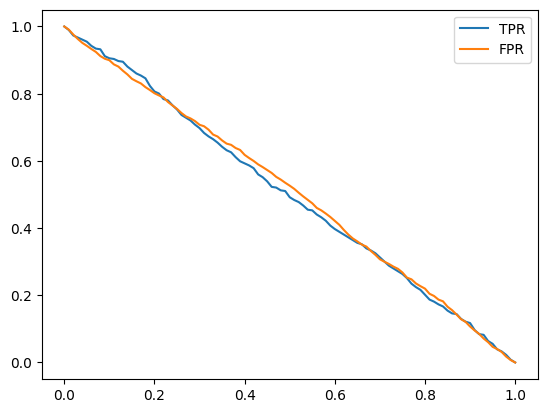

In [183]:
plt.plot(df_rand.thresholds, df_rand.tpr, label='TPR')
plt.plot(df_rand.thresholds, df_rand.fpr, label='FPR')
plt.legend()

In [184]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0,1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

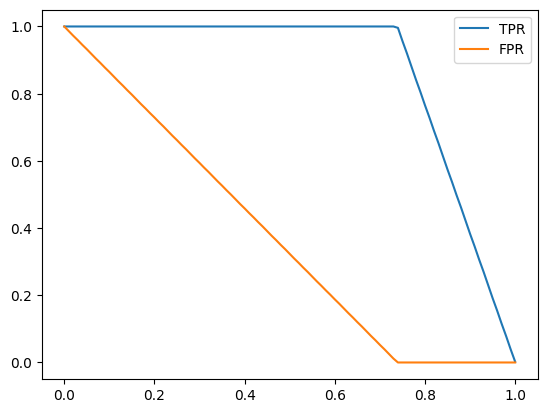

In [185]:
plt.plot(df_ideal.thresholds, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.thresholds, df_ideal.fpr, label='FPR')
plt.legend()

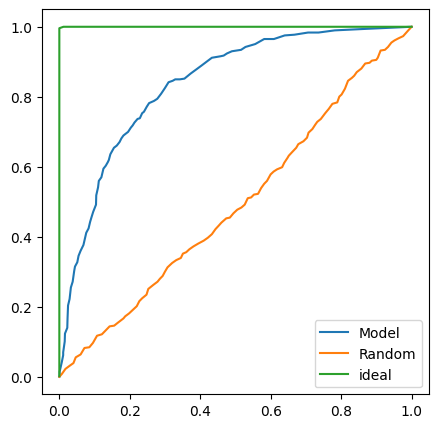

In [186]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label="Random")
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.legend()

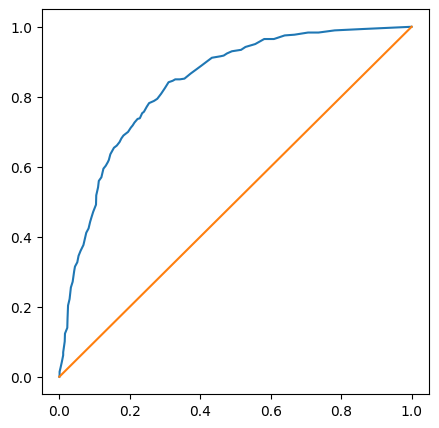

In [187]:
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0,1], [0,1])

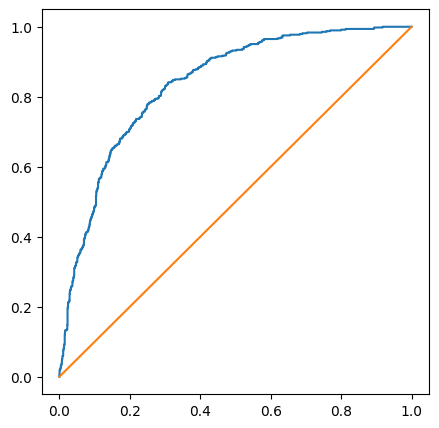

In [188]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5,5))

plt.plot(fpr, tpr)

plt.plot([0,1], [0,1])

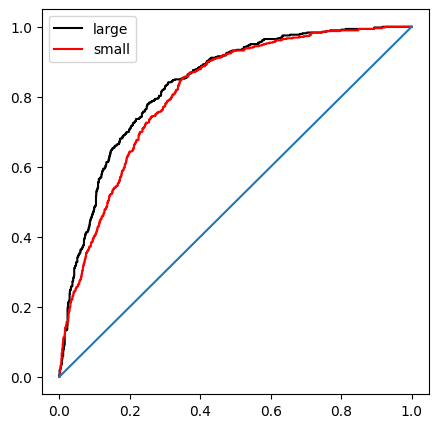

In [189]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val,y_pred_small)

plt.figure(figsize=(5,5))

plt.plot(fpr_large, tpr_large, color='black', label='large')
plt.plot(fpr_small, tpr_small, color='red', label='small')
plt.plot([0,1], [0,1])
plt.legend()

In [190]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [191]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_val, y_pred)

0.8363381374257972

In [192]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)

(pos[pos_choice] > neg[neg_choice]).mean()

0.8356

In [193]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver="liblinear")
    model.fit(X,y)

    return dv, model

In [194]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [196]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

In [197]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


In [202]:
def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X,y)

    return dv, model

In [203]:
nfolds = 5

kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:

    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.008
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


In [204]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)

y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858


In [205]:
df = pd.DataFrame([customer])
y_pred = predict(df, dv, model)
y_pred[0]

0.05960550948732179

In [206]:
def predict_single(customer, dv, model):
    X = dv.transform([customer])
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred[0]

In [207]:
import pickle

with open('churn-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [4]:
import requests

customer = {
    'customerid' : '8879-zkjof',
    'gender' : 'female',
    'seniorcitizen' : 0,
    'partner' : 'no',
    'dependents' : 'no',
    'tenure' : 41,
    'phoneservice' : 'yes',
    'multiplelines' : 'no',
    'internetservice' : 'dsl',
    'onlinesecurity' : 'yes',
    'onlinebackup' : 'no',
    'deviceprotection' : 'yes',
    'techsupport' : 'yes',
    'streamingtv' : 'yes',
    'streamingmovies' : 'yes',
    'contract' : 'one_year',
    'paperlessbilling':'yes',
    'paymentmethod':'bank_transfer_(automatic)',
    'monthlycharges':79.85,
    'totalcharges' : 3320.75,
 }


url = 'http://127.0.0.1:9696/predict'
response = requests.post(url, json=customer)

result = response.json()

In [5]:
print(result)

{'churn': False, 'churn_probability': 0.05960550948732179}


In [6]:
host = 'churn-serving-env.eba-j7zttux3.us-west-2.elasticbeanstalk.com'
url = 'http://%s/predict' % host
response = requests.post(url, json=customer)
result = response.json()

In [7]:
result

{'churn': False, 'churn_probability': 0.05960550948732181}